In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if len(gpus) > 0 : print('Available GPUs: {}'.format(gpus))
else             : print('!!! No GPUs found !!!')

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

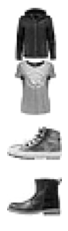

In [7]:
plt.imshow(X_train[:4].reshape(28 * 4, -1), cmap="binary")
plt.axis('off')
plt.show()

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Saving figure fashion_mnist_plot


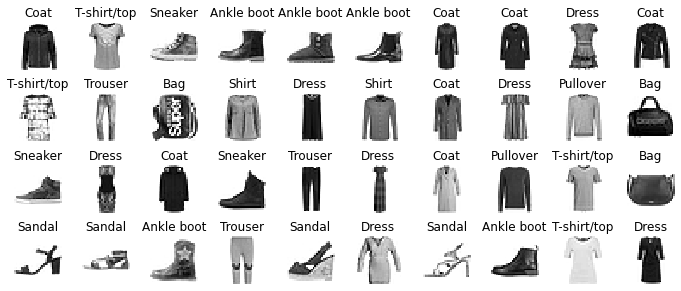

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.layers

Metal device set to: Apple M1 Pro


2021-12-01 09:20:39.807494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-01 09:20:39.807927: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [14]:
hidden1 = model.layers[1]

weights, biases = hidden1.get_weights()

print(hidden1.name)
print(model.get_layer(hidden1.name) is hidden1)

dense
True


In [15]:
weights

array([[-7.7126175e-03, -5.1753372e-03, -4.0757809e-02, ...,
        -3.4693059e-02,  5.7259560e-02, -9.8694861e-04],
       [ 4.2663954e-02,  4.6201803e-02,  5.7093099e-02, ...,
         2.6433408e-02,  2.1627992e-02, -5.1712904e-02],
       [ 1.4723711e-02, -1.7179858e-02, -1.3241451e-02, ...,
         1.0088667e-02,  4.0254533e-02, -4.3751478e-02],
       ...,
       [ 6.2062889e-02,  5.3107738e-05, -5.5856287e-02, ...,
        -2.8994154e-02, -5.6318417e-03,  3.9794110e-02],
       [ 1.2825601e-02,  3.5383739e-02, -6.0437959e-02, ...,
         4.9483806e-02,  4.5170099e-02, -3.3591077e-02],
       [ 6.3673571e-02,  1.7506674e-02, -2.7629297e-02, ...,
         6.9510594e-02, -4.0622950e-02,  4.0614098e-02]], dtype=float32)

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

2021-12-01 09:20:40.532791: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-01 09:20:40.535190: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-01 09:20:40.631000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/30
1713/1719 [============================>.] - ETA: 0s - loss: 0.7171 - accuracy: 0.7613

2021-12-01 09:20:49.166990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 9s 5ms/step - loss: 0.7163 - accuracy: 0.7616 - val_loss: 0.5296 - val_accuracy: 0.8192
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4899 - accuracy: 0.8294 - val_loss: 0.4412 - val_accuracy: 0.8492
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4430 - accuracy: 0.8434 - val_loss: 0.5356 - val_accuracy: 0.7984
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4152 - accuracy: 0.8555 - val_loss: 0.3992 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3966 - accuracy: 0.8615 - val_loss: 0.3818 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3779 - accuracy: 0.8668 - val_loss: 0.3763 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3656 - accuracy: 0.8719 - val_loss: 0.3762 - val_accuracy: 0.8692
Epo

Saving figure keras_learning_curves_plot


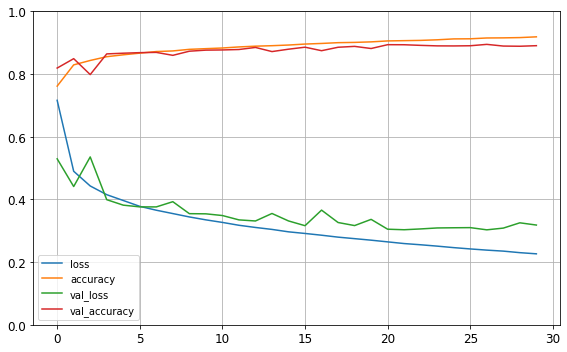

In [18]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3451 - accuracy: 0.8781


[0.3450942933559418, 0.8781000375747681]

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

2021-12-01 09:25:02.898464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(np.array(class_names)[y_pred])
print(y_pred)
print(y_test[:3])

['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]
[9 2 1]


Saving figure fashion_mnist_images_plot


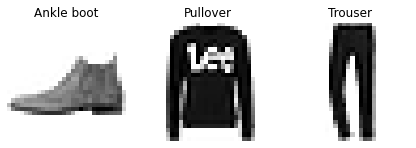

In [22]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


2021-12-01 10:54:04.877177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 2.6278

2021-12-01 10:54:06.458464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 4ms/step - loss: 2.6278 - val_loss: 1.4769
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8861 - val_loss: 0.7375
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7529 - val_loss: 0.7506
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7058 - val_loss: 0.6578
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6738 - val_loss: 0.6311
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6455 - val_loss: 0.6757
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6212 - val_loss: 0.7485
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6003 - val_loss: 0.5759
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5783 - val_loss: 0.6269
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5585 - val_loss: 0.7089
Epoch 11/2

2021-12-01 10:54:31.369720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


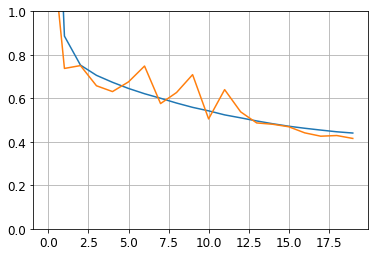

In [25]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
y_pred

array([[0.7626561],
       [1.5420301],
       [3.370695 ]], dtype=float32)

In [27]:
model.save("my_keras_model.h5")

In [28]:
model2 = keras.models.load_model("my_keras_model.h5")
model2.predict(X_new)

2021-12-01 11:30:48.691069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.7626561],
       [1.5420301],
       [3.370695 ]], dtype=float32)

In [29]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_12_01-11_59_17'

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [33]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

2021-12-01 12:00:16.272169: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-01 12:00:16.272230: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-01 12:00:16.272681: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-12-01 12:00:16.441830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/30
 43/363 [==>...........................] - ETA: 1s - loss: 5.3474

2021-12-01 12:00:16.484998: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-01 12:00:16.485010: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-01 12:00:16.490915: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-01 12:00:16.494149: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-12-01 12:00:16.498089: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs/run_2021_12_01-11_59_17/train/plugins/profile/2021_12_01_12_00_16

2021-12-01 12:00:16.498757: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2021_12_01-11_59_17/train/plugins/profile/2021_12_01_12_00_16/MBP-Kevin.attlocal.net.trace.json.gz
2021-12-01 12:00:16.501499: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs

352/363 [============================>.] - ETA: 0s - loss: 2.5305

2021-12-01 12:00:17.751764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 4ms/step - loss: 2.4880 - val_loss: 1.2107
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.8482 - val_loss: 0.9154
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6460 - val_loss: 0.6363
Epoch 4/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5905 - val_loss: 0.5427
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5565 - val_loss: 0.5121
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5279 - val_loss: 0.4895
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5060 - val_loss: 0.4798
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4875 - val_loss: 0.4539
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4714 - val_loss: 0.4366
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4586 - val_loss: 0.4252
Epoch 11/3

In [34]:
run_logdir2 = get_run_logdir()
print(run_logdir2)

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))


tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

./my_logs/run_2021_12_01-12_36_46
Epoch 1/30
 11/363 [..............................] - ETA: 1s - loss: 2.1748 

2021-12-01 12:36:46.214664: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-01 12:36:46.214679: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-01 12:36:46.214705: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-12-01 12:36:46.296144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 12:36:46.339654: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-01 12:36:46.339670: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-01 12:36:46.354365: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-01 12:36:46.354652: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-12-01 12:36:46.355143: I tensorflow/core/profiler

358/363 [============================>.] - ETA: 0s - loss: 0.5214

2021-12-01 12:36:47.589024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 4ms/step - loss: 0.5202 - val_loss: 0.5861
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3819 - val_loss: 0.8341
Epoch 3/30
363/363 [==============================] - 2s 4ms/step - loss: 0.3817 - val_loss: 0.6573
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3557 - val_loss: 0.3202
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3453 - val_loss: 0.3310
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3361 - val_loss: 0.3030
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3273 - val_loss: 0.3005
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3212 - val_loss: 0.3061
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3155 - val_loss: 0.3015
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3128 - val_loss: 0.3596
Epoch 11/3